# Analyzing Data to Investigate Risk Factors in Heart Failure Patients to Predict Mortality 

### Introduction

A prevalent complex clinical combination of symptoms and signs known as heart failure is brought on by a decrease in the heart's function as a pump supporting the circulatory system (National Guideline Centre, 2018). The death risk in the first year after treatment is about 35% while the risk of death is less than 10% in the second year for those that are still alive (National Clinical Guideline Centre, 2010). Data analysis on heart failure is significant because it can provide valuable insights into the causes and  risk factors of heart failure. We will look into different patients’ health reports and their experience of heart failure to help us determine the factors that are most influential in predicting possible death of patients with heart failure. 


<img src="hiiii.jpeg" width="250"> <img src="hellooooo.jpeg" width="250">

This leads to the question: **Is it possible to predict whether a patient who has already experienced heart failure will die based on the most influential components of a patient's health?**


To answer this question, we will examine a dataset made up of 13 attributes among 299 patients. This data was retrieved from the `heart_failure_clinical_records_dataset.csv` file in the Heart Disease dataset directory, which may be accessed at: https://archive.ics.uci.edu/ml/datasets/Heart+failure+clinical+records (Chicco et al., 2020).


|Variable|Unit|Values|
|--------|----|---------------|
|age: age of the patient|years|positive integers|
|anaemia: decrease of red blood cells or hemoglobin|NA|0 = false; 1 = true|
|high_blood_pressure: if the patient has hypertension|NA|0 = false; 1 = true|
|creatinine_phosphokinase: level of the CPK enzyme in the blood|mcg/L|positive integers|
|diabetes: if the patient has diabetes|NA|0 = false; 1 = true|
|ejection_fraction: percentage of blood leaving the heart at each contraction|%|positive integers|
|platelets: platelets in the blood|kiloplatelets/mL|positive integers|
|sex: woman or man|NA|0 = female; 1 = male|
|serum_creatinine: level of serum creatinine in the blood|mg/dL|positive numbers|
|serum_sodium: level of serum sodium in the blood|mEq/L|positive integers|
|smoking: if the patient smokes or not|NA|0 = false; 1 = true|
|time: follow-up period (285 days)|days|positive integers|
|DEATH_EVENT: if the patient deceased during the follow-up period|NA|0 = false; 1 = true|



From this table, we can see that our dataset includes many variables. However, for our model to be accurate, we need to include only those which have a significant effect on mortality. According to a study conducted by Ahmad et al. (2017), the variables `age`, `anaemia`, `high_blood_pressure`, `ejection_fraction`, `serum_creatinine` and `serum_sodium` had the greatest influence on the accuracy of their prediction model and as such we will use these variables too.

### Methods

Our objective is to predict the death_event class using the optimal predictor variables, which we will select, to build a K-NN Classification model. The measures we will take to do this are as follows:
1. Read-in and tidy the dataset: After loading in the dataset, it must be tidied.
2. Train/Test split: The dataset is split into training and testing sets and the accuracy is determined through cross-validation.
3. Analyze and summarise our training set: Using scatterplot and bar graph, the cross-validation of the training data is visualized to see the variance in the range and median of the different attributes.
4. Discover the ideal 𝑘  value and construct our final model.
5. Evaluation and Conclusion.


### Expected Outcomes

With our algorithm that accurately forecasts fatality in patients with heart failure, our expected outcome would be to correctly predict whether a patient having heart failure will die based on the most influential components affecting it.
	
There is a huge impact of our findings as our results can have real-world implications since we could use this model to predict the likelihood that a person having heart failure will die and administer the appropriate level of treatment and monitoring based on other health variables that may be of concern.

Future questions that may be resulted from this is if there are any other variables that are in or outside this datatable that will make the classification more accurate in determining the likelihood of death from a patient who’s been through heart failure.


### Preliminary exploratory data analysis

First, load the libraries:

In [1]:
install.packages("themis")

library(repr)
library(tidyverse)
library(tidymodels)
library(cowplot)
library(GGally)
library(themis)

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.0     ✔ rsample      1.0.0
✔ dials        1.0.0     ✔ tune         1.0.0
✔ infer        1.0.2     ✔ workflows    1.0.0
✔ modeldata    1.0.0     ✔ workflowsets 1.0.0
✔ parsnip      1.0.0     ✔ yardstick    1.0.0
✔ recipes      1.0.1     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks st

**Reading in the dataset from the web** and selecting 8 rows to observe.

In [2]:
heart_data <- read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/00519/heart_failure_clinical_records_dataset.csv")
slice_sample(heart_data, n = 8)

Rows: 299 Columns: 13
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (13): age, anaemia, creatinine_phosphokinase, diabetes, ejection_fractio...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
45,0,582,0,14,0,166000,0.8,127,1,0,14,1
49,1,80,0,30,1,427000,1.0,138,0,0,12,0
53,0,63,1,60,0,368000,0.8,135,1,0,22,0
50,1,1051,1,30,0,232000,0.7,136,0,0,246,0
50,1,121,1,40,0,260000,0.7,130,1,0,175,0
60,0,2261,0,35,1,228000,0.9,136,1,0,115,0
43,1,358,0,50,0,237000,1.3,135,0,0,97,0
65,0,56,0,25,0,237000,5.0,130,0,0,207,0


Looking at the `DEATH_EVENT` column, if the variable is 0, it means that the patient is alive. If the variable is 1, it means that the the patient died.

In [3]:
heart_data <- select(heart_data, -anaemia, -diabetes, -high_blood_pressure, -sex, -smoking)
slice_sample(heart_data, n = 8)

age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,time,DEATH_EVENT
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
53,707,38,330000,1.40,137,209,0
72,211,25,274000,1.20,134,207,0
70,835,35,305000,0.80,133,145,0
75,582,30,225000,1.83,134,113,1
75,246,15,127000,1.20,137,10,1
60,53,50,286000,2.30,143,87,0
82,379,50,47000,1.30,136,13,1
63,61,40,221000,1.10,140,86,0


We will then check if any rows contain NA's and remove them.

In [4]:
heart_data[rowSums(is.na(heart_data)) > 0, ]

age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,time,DEATH_EVENT
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>


There aren't any rows containing any missing values. Therefore we do not have to remove any cases from the dataframe.

We then used `mutate` to convert all predictors into numeric data; convert target variable to a factor using `as_factor`.

In [5]:
heart_data <- heart_data |>
  mutate(DEATH_EVENT = as_factor(DEATH_EVENT))

slice(heart_data, 1)

age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,time,DEATH_EVENT
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
75,582,20,265000,1.9,130,4,1


**After tidying our data to a format that is suitable for analysis, we continue to next step by focusing specifically on the training data.**
<br>We choose to split 75% of our original data set into the training set.

In [6]:
heart_split <- initial_split(heart_data, prop = 0.75, strata = DEATH_EVENT)  
heart_train <- training(heart_split)   
heart_test <- testing(heart_split)

Since all of the predictor variables contains quantitative data, we used `group_by` to separate each class label, and find the mean of each predictor variable under each class label using `summarize` + `across`.

In [7]:
observations <- heart_data |>
    group_by(DEATH_EVENT) |>
    summarize(across(age:serum_sodium, mean))

observations

DEATH_EVENT,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0,58.76191,540.0542,40.26601,266657.5,1.184877,137.2167
1,65.21528,670.1979,33.46875,256381.0,1.835833,135.3750


**We can also find the mean of all predictor variables.**

In [8]:
observations_2 <- heart_train |> 
summarize(across(age:serum_sodium, mean))

observations_2

age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
60.78274,550.1741,38.18304,265375.8,1.358393,136.7009


**Next, we use `group_by` + `summarize` to find out the distribution of each of our target variable (DEATH_EVENT).**

In [9]:
observations_count <- heart_train |>
    group_by(DEATH_EVENT) |>
    summarize(count=n())
observations_count

DEATH_EVENT,count
<fct>,<int>
0,152
1,72


**We can use a bar graph to plot the distribution.**

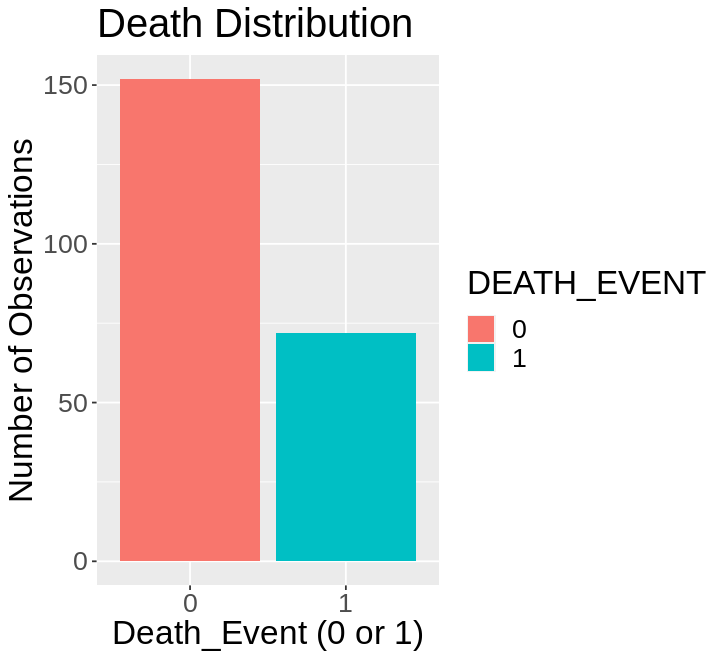

In [10]:
options(repr.plot.width = 6, repr.plot.height = 5.5)

heart_plot <- ggplot(observations_count, aes(x = DEATH_EVENT, y = count, fill = DEATH_EVENT)) +
  geom_bar(stat = "identity") +
  labs(x = "Death_Event (0 or 1)", y = "Number of Observations") +
  ggtitle("Death Distribution") +
  theme(text = element_text(size = 20))

heart_plot

One problem that could arise when making a prediction model on our data set is class imbalance, where some classes have fewer instances than others. To address this in our final project, we plan to incorporate an oversampling step using the `step_upsample` function from the `themis` R package. This will solve the problem of the underrepresented class not having enough data in the K-nearest neighbor algorithm.

In [11]:
age_graph <- ggplot(heart_train, aes(x = age, y = DEATH_EVENT, fill = DEATH_EVENT)) +
    geom_boxplot(alpha = 0.4) +
    xlab("Age") +
    ylab("Death Event") +
    theme(text = element_text(size = 14))
creatinine_phosphokinase_graph <- ggplot(heart_train, aes(x = creatinine_phosphokinase, y = DEATH_EVENT, fill = DEATH_EVENT)) +
    geom_boxplot(alpha = 0.4) +
    xlab("Creatinine Phosphokinase") +
    ylab("Death Event") +
    theme(text = element_text(size = 14))
ejection_fraction_graph <- ggplot(heart_train, aes(x = ejection_fraction, y = DEATH_EVENT, fill = DEATH_EVENT)) +
    geom_boxplot(alpha = 0.4) +
    xlab("Ejection Fraction") +
    ylab("Death Event") +
    theme(text = element_text(size = 14))
serum_creatinine_graph <- ggplot(heart_train, aes(x = serum_creatinine, y = DEATH_EVENT, fill = DEATH_EVENT)) +
    geom_boxplot(alpha = 0.4) +
    xlab("Serum Creatinine") +
    ylab("Death Event") +
    theme(text = element_text(size = 14))
platelets_graph <- ggplot(heart_train, aes(x = platelets, y = DEATH_EVENT, fill = DEATH_EVENT)) +
    geom_boxplot(alpha = 0.4) +
    xlab("Platelets") +
    ylab("Death Event") +
    theme(text = element_text(size = 14))
serum_sodium_graph <- ggplot(heart_train, aes(x = serum_sodium, y = DEATH_EVENT, fill = DEATH_EVENT)) +
    geom_boxplot(alpha = 0.4) +
    xlab("Serum Sodium") +
    ylab("Death Event") +
    theme(text = element_text(size = 14))
time_graph <- ggplot(heart_train, aes(x = time, y = DEATH_EVENT, fill = DEATH_EVENT)) +
    geom_boxplot(alpha = 0.4) +
    xlab("Time") +
    ylab("Death Event") +
    theme(text = element_text(size = 14))

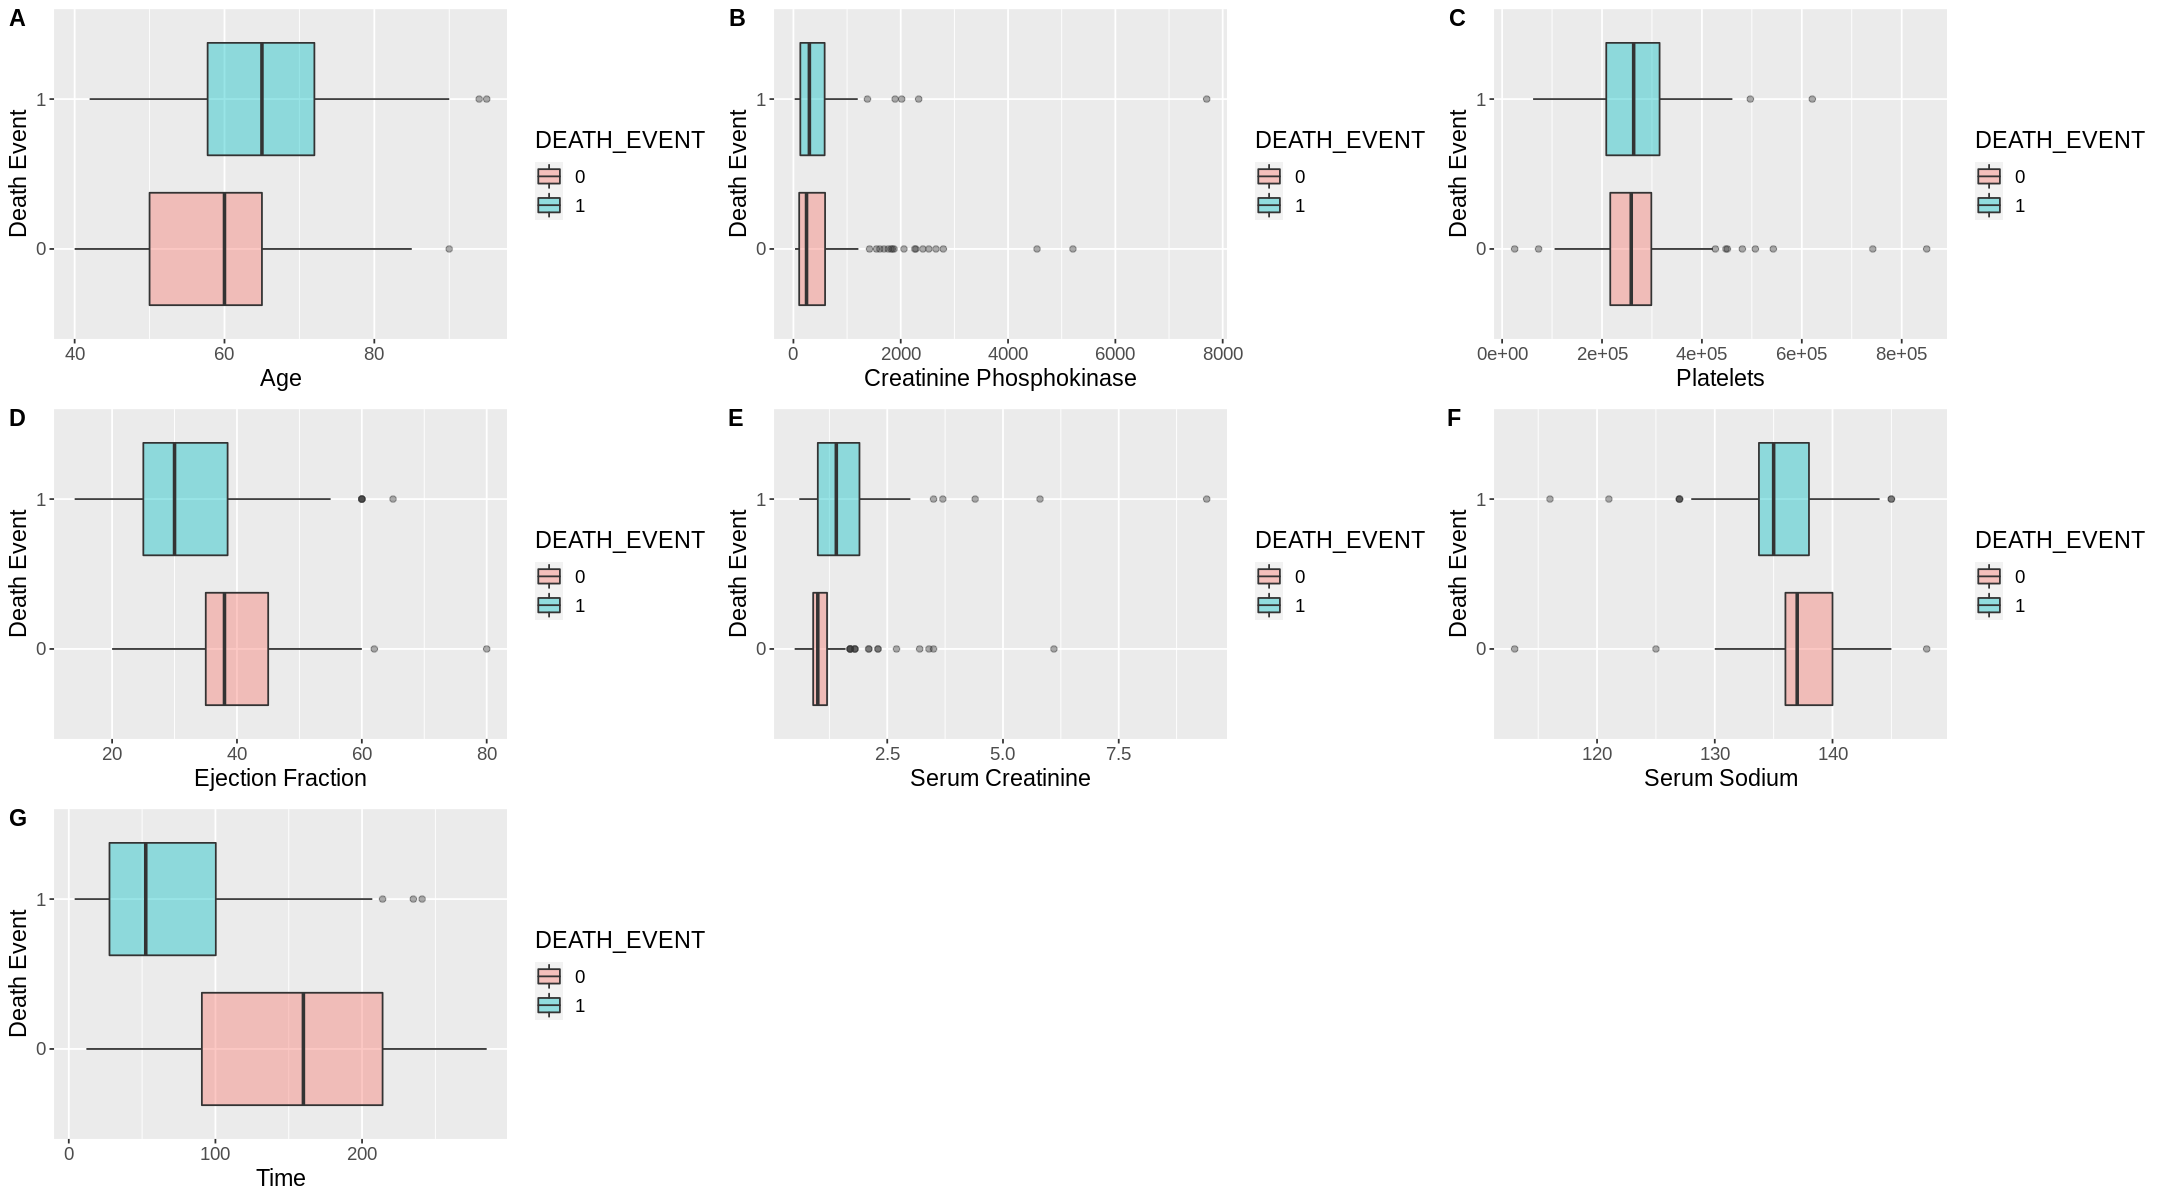

In [12]:
options(repr.plot.width = 18, repr.plot.height = 10)

plot_grid(age_graph,
          creatinine_phosphokinase_graph,
          platelets_graph,
          ejection_fraction_graph, 
          serum_creatinine_graph,
          serum_sodium_graph,
          time_graph,
          labels = c("A", "B", "C", "D", "E", "F", "G"),
          ncol = 3)

- We can visualize the range and median of values for each predictor variable separated by `DEATH_EVENT` using `ggplot()` and `geom_boxplot()`.
- By looking at the boxplots for our training/testing split, we can see that the variables `age`, `ejectioin_fraction`, `serum_sodium`, and `time` vary in range and median for each category of `DEATH_EVENT`. This means that they may have a significant impact on predicting whether patients die or not.
- From the plots of `creatinine_phosphokinase`, `platelets`, and `serum_creatinine`, we can see that they do not vary much in range, median or both.

### Analyzing and Selecting Predictor Variables

As noted above, we need to ensure that our training model consists of an equal number of observation for each `DEATH_EVENT` category. 

In [13]:
heart_vfold <- vfold_cv(heart_train, v = 5, strata = DEATH_EVENT)

gridvals <- tibble(neighbors = seq(1, 20))

knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
    set_engine("kknn") |>
    set_mode("classification")

In [16]:
a_recipe <- recipe(DEATH_EVENT ~ age, heart_train) |>
    step_scale(all_predictors()) |>
    step_center(all_predictors())

a_results <- workflow() |>
    add_recipe(a_recipe) |>
    add_model(knn_spec) |>
    tune_grid(resamples = heart_vfold, grid = gridvals) |>
    collect_metrics() |>
    filter(.metric == "accuracy")

a_results_best <- a_results |>
    arrange(desc(mean)) |>
    slice(1) |>
    pull(mean)

### References

National Guideline Centre (UK). Chronic Heart Failure in Adults: Diagnosis and Management. London: National Institute for Health and Care Excellence (NICE); 2018 Sep. (NICE Guideline, No. 106.) 2, Introduction. Available from: https://www.ncbi.nlm.nih.gov/books/NBK536089/.
